In [1]:
import numpy as np
import matplotlib.pyplot as plt

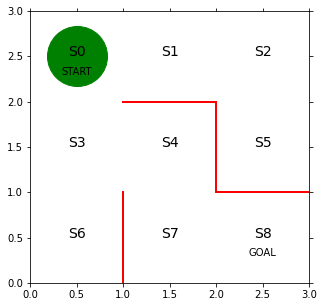

In [2]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

xpos = [0.5, 1.5, 2.5]
ypos = [2.5, 1.5, 0.5]
for y in range(3):
    for x in range(3):
        plt.text(xpos[x], ypos[y], 'S' + str(y * 3 + x), size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
               labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)


In [3]:
# 上 右 下 左
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, np.nan, 1],
    [np.nan, np.nan, 1, 1],
    [1, 1, 1, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, np.nan, np.nan, np.nan],
    [1, np.nan, np.nan, np.nan],
    [1, 1, np.nan, np.nan],
])

In [4]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i,:] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    return pi
    

In [5]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
    return s_next
    
    

In [7]:
def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while True:
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
    return state_history

In [8]:
state_history = goal_maze(pi_0)

In [9]:
print(state_history)

[0, 1, 0, 3, 0, 1, 2, 1, 0, 1, 0, 3, 4, 7, 8]


In [10]:
from matplotlib import animation
from IPython.display import HTML

In [11]:
def init():
    line.set_data([], [])
    return (line,)

In [12]:
def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

In [13]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history),
                               interval=200, repeat=False)

HTML(anim.to_jshtml())

In [14]:
def softmax_convert_into_pi_from_theta(theta):
    
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i,:] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
    return pi
    

In [34]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
from random import random
pi_0 = np.array([
    [0, 0.3, 0.7, 0],
    [0, 0.2, 0, 0.8],
    [0, 0, 0.1, 0.9],
    [0.3, 0.5, 0.2, 0],
    [0, 0, 0.6, 0.4],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [0.5, 0.5, 0, 0]
])

In [35]:
print(pi_0)

[[0.  0.3 0.7 0. ]
 [0.  0.2 0.  0.8]
 [0.  0.  0.1 0.9]
 [0.3 0.5 0.2 0. ]
 [0.  0.  0.6 0.4]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.5 0.5 0.  0. ]]


In [36]:
def get_action_and_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s,:])
    if next_direction == 'up':
        action = 0
        s_next = s - 3
    elif next_direction == 'right':
        action = 1
        s_next = s + 1
    elif next_direction == 'down':
        action = 2
        s_next = s + 3
    elif next_direction == 'left':
        action = 3
        s_next = s - 1
    return action, s_next
    

In [37]:
def goal_maze_ret_s_a(pi):
    s = 0
    state_history = [[0, np.nan]]
    
    while True:
        action, next_s = get_action_and_next_s(pi, s)
        state_history[-1][1] = action
        
        state_history.append([next_s, np.nan])
        
        
        if next_s == 8:
            break
        else:
            s = next_s
    return state_history

In [38]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)


[[0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]


In [39]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    m, n = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
    new_theta = theta + eta * delta_theta
    return new_theta

In [40]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.    0.503 0.497 0.   ]
 [0.    0.499 0.    0.501]
 [0.    0.    0.5   0.5  ]
 [0.333 0.331 0.336 0.   ]
 [0.    0.    0.501 0.499]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.498 0.502 0.    0.   ]]


In [41]:
stop_eps = 10 ** -4
theta = theta_0
pi = pi_0

is_continue = True
count = 1

while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    print('Use', len(s_a_history) - 1, 'steps')
    
    if np.sum(np.abs(new_pi - pi)) < stop_eps:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

2.336111378314981
Use 18 steps
0.04865483628447603
Use 4 steps
0.009740504220234536
Use 20 steps
0.025909685311187314
Use 10 steps
0.02576070385111401
Use 14 steps
0.04779424326281789
Use 4 steps
0.012700657720410402
Use 30 steps
0.013562400300728028
Use 14 steps
0.005547016037083852
Use 40 steps
0.011691600221364451
Use 24 steps
0.011804358105221235
Use 26 steps
0.01560501279937826
Use 34 steps
0.04720873910599077
Use 4 steps
0.02837157930145201
Use 16 steps
0.008131677918255975
Use 62 steps
0.015261325348564392
Use 30 steps
0.028797227455272245
Use 8 steps
0.010978313402365325
Use 122 steps
0.019858208780684228
Use 14 steps
0.015234518715163958
Use 14 steps
0.008998388583924044
Use 52 steps
0.012680953446667642
Use 32 steps
0.01879674901126399
Use 10 steps
0.008557664872743953
Use 86 steps
0.010690510840607403
Use 46 steps
0.013855651280011871
Use 30 steps
0.012482502478337154
Use 40 steps
0.008909542186845587
Use 90 steps
0.0073193278296649344
Use 78 steps
0.012745735937445879
Use 3

0.008915768258697776
Use 4 steps
0.008812199771646184
Use 4 steps
0.00871026489864525
Use 4 steps
0.011864236563877334
Use 6 steps
0.008604204916758118
Use 4 steps
0.012210213342016621
Use 6 steps
0.012178322175059542
Use 6 steps
0.00851794413366358
Use 4 steps
0.008420414313829824
Use 4 steps
0.020878633728327864
Use 8 steps
0.008405378363100208
Use 4 steps
0.008309529946174316
Use 4 steps
0.00821517728516305
Use 4 steps
0.00812229205430344
Use 4 steps
0.015675661320525724
Use 8 steps
0.011724046368711952
Use 6 steps
0.008109426285323365
Use 4 steps
0.008971601407364818
Use 6 steps
0.012496303320005439
Use 8 steps
0.012458869493265093
Use 8 steps
0.008110257218519809
Use 4 steps
0.009345911305208912
Use 6 steps
0.008008548937160506
Use 4 steps
0.012116312572142893
Use 8 steps
0.007969770105271029
Use 4 steps
0.00788090034869969
Use 4 steps
0.01571041254495595
Use 14 steps
0.012047248479234829
Use 18 steps
0.008023389036120182
Use 4 steps
0.011719296959145836
Use 6 steps
0.012566679121

0.0032103326758940454
Use 4 steps
0.00318536925509251
Use 4 steps
0.0031606838226969497
Use 4 steps
0.0031362724399286307
Use 4 steps
0.0031121312342078378
Use 4 steps
0.003088256397904457
Use 4 steps
0.0030646441871081953
Use 4 steps
0.0030412909204283745
Use 4 steps
0.003018192977814277
Use 4 steps
0.0029953467994026373
Use 4 steps
0.002972748884386117
Use 4 steps
0.0029503957899057465
Use 4 steps
0.0029282841299650697
Use 4 steps
0.0029064105743667745
Use 4 steps
0.010037373059216051
Use 10 steps
0.002939211739574246
Use 4 steps
0.0029172102032762395
Use 4 steps
0.0028954453914998707
Use 4 steps
0.006530275386896198
Use 8 steps
0.007030313283810326
Use 10 steps
0.005869489968317321
Use 6 steps
0.0029677352465063353
Use 4 steps
0.002945458904557989
Use 4 steps
0.0029234227611577984
Use 4 steps
0.002901623507017538
Use 4 steps
0.0028800578872608257
Use 4 steps
0.006593617598581708
Use 8 steps
0.0028981195515014047
Use 4 steps
0.002876570826073177
Use 4 steps
0.005637509937412709
Use 6

0.00152300674920728
Use 4 steps
0.0015143970045420826
Use 4 steps
0.003984043464303096
Use 6 steps
0.0015142050239949079
Use 4 steps
0.0015056867395287568
Use 4 steps
0.0014972390452559076
Use 4 steps
0.0014888611749851802
Use 4 steps
0.0014805523727130857
Use 4 steps
0.0014723118924644604
Use 4 steps
0.004924114814421801
Use 8 steps
0.001487538323106559
Use 4 steps
0.008499865999414019
Use 8 steps
0.0015075953653449978
Use 4 steps
0.001499119447841743
Use 4 steps
0.0014907137750626784
Use 4 steps
0.0014823775841577985
Use 4 steps
0.0014741101224289496
Use 4 steps
0.0014659106471711092
Use 4 steps
0.005163763575675044
Use 8 steps
0.0014742539113758238
Use 4 steps
0.0014660781014125962
Use 4 steps
0.001457969056266377
Use 4 steps
0.0014499260618241125
Use 4 steps
0.0014419484133349342
Use 4 steps
0.0014340354152661827
Use 4 steps
0.001426186381161633
Use 4 steps
0.0014184006335028199
Use 4 steps
0.001410677503572516
Use 4 steps
0.0014030163313195967
Use 4 steps
0.0013954164652295042
Use

0.0007129522745223833
Use 4 steps
0.0007101307459433694
Use 4 steps
0.003715985810253699
Use 8 steps
0.0007178286159570356
Use 4 steps
0.000714985805882036
Use 4 steps
0.0007121597669370421
Use 4 steps
0.0007093503679473749
Use 4 steps
0.0007065574790134956
Use 4 steps
0.0007037809714959022
Use 4 steps
0.0007010207180007874
Use 4 steps
0.0006982765923655397
Use 4 steps
0.0006955484696441576
Use 4 steps
0.0006928362260936773
Use 4 steps
0.0006901397391609124
Use 4 steps
0.0006874588874673515
Use 4 steps
0.00283985683969493
Use 6 steps
0.0006907472302367275
Use 4 steps
0.0006880671263967512
Use 4 steps
0.0006854024993844972
Use 4 steps
0.0006827532307945999
Use 4 steps
0.0006801192033479148
Use 4 steps
0.0027255743076421354
Use 6 steps
0.0063081832335198686
Use 6 steps
0.000689095616455998
Use 4 steps
0.0006864350191985377
Use 4 steps
0.0006837896812330047
Use 4 steps
0.0006811594867932973
Use 4 steps
0.000678544321204063
Use 4 steps
0.0006759440708657694
Use 4 steps
0.002751492064419412

0.0004914492507155713
Use 4 steps
0.0004898288712548715
Use 4 steps
0.002684543312820274
Use 6 steps
0.0004958341621885062
Use 4 steps
0.005894329617220001
Use 10 steps
0.0005066201599146641
Use 4 steps
0.0005049177794943481
Use 4 steps
0.0005032239643050947
Use 4 steps
0.0005015386569137449
Use 4 steps
0.0021619837530316016
Use 6 steps
0.002759640022620663
Use 6 steps
0.0005116085963168156
Use 4 steps
0.0005098795629212283
Use 4 steps
0.0005081592887093457
Use 4 steps
0.000506447714463041
Use 4 steps
0.0005047447814620597
Use 4 steps
0.0005030504314841207
Use 4 steps
0.0057386093980470385
Use 6 steps
0.0005057489292723399
Use 4 steps
0.0005040535902639531
Use 4 steps
0.0005023667585551915
Use 4 steps
0.0005006883772346662
Use 4 steps
0.0004990183898667851
Use 4 steps
0.0004973567404879913
Use 4 steps
0.0004957033736009524
Use 4 steps
0.0004940582341703831
Use 4 steps
0.0004924212676179623
Use 4 steps
0.0004907924198192214
Use 4 steps
0.0004891716370970002
Use 4 steps
0.000487558866217

0.0003052495004785827
Use 4 steps
0.00030445875695072136
Use 4 steps
0.00030367106564126514
Use 4 steps
0.00186709482879472
Use 6 steps
0.00030657935722958746
Use 4 steps
0.00030578366564167764
Use 4 steps
0.0003049910503244574
Use 4 steps
0.00030420149549429884
Use 4 steps
0.00030341498546752194
Use 4 steps
0.0003026315046607726
Use 4 steps
0.0003018510375913386
Use 4 steps
0.0003010735688730934
Use 4 steps
0.00030029908321969195
Use 4 steps
0.00029952756544019896
Use 4 steps
0.0002987590004415834
Use 4 steps
0.000297993373224701
Use 4 steps
0.0002972306688875173
Use 4 steps
0.0002964708726198202
Use 4 steps
0.00029571396970645356
Use 4 steps
0.0002949599455252805
Use 4 steps
0.00029420878554511573
Use 4 steps
0.00029346047532549657
Use 4 steps
0.00029271500051968394
Use 4 steps
0.0002919723468673037
Use 4 steps
0.00029123250020047023
Use 4 steps
0.0002904954464375588
Use 4 steps
0.0002897611715862898
Use 4 steps
0.00028902966174090827
Use 4 steps
0.0002883009030834986
Use 4 steps
0.0

0.00020654757817790276
Use 4 steps
0.004817264739196662
Use 6 steps
0.0002081886993927258
Use 4 steps
0.0002077389977909027
Use 4 steps
0.00020729075075484084
Use 4 steps
0.00020684395200814241
Use 4 steps
0.00020639859531124995
Use 4 steps
0.00020595467445695854
Use 4 steps
0.00020551218327001866
Use 4 steps
0.00020507111561174005
Use 4 steps
0.00020463146537334428
Use 4 steps
0.00020419322648043692
Use 4 steps
0.0002037563928907124
Use 4 steps
0.0002033209585951684
Use 4 steps
0.0002028869176148012
Use 4 steps
0.00020245426400510545
Use 4 steps
0.0002020229918518711
Use 4 steps
0.00020159309527222925
Use 4 steps
0.000201164568415884
Use 4 steps
0.00020073740546312432
Use 4 steps
0.001400461951349196
Use 6 steps
0.0002027654248940476
Use 4 steps
0.00020233360075382761
Use 4 steps
0.00020190315246390936
Use 4 steps
0.0002014740741847383
Use 4 steps
0.00020104636010547829
Use 4 steps
0.00020062000444864662
Use 4 steps
0.0002001950014650436
Use 4 steps
0.00019977134543695992
Use 4 steps


0.00016704385479688819
Use 4 steps
0.0001667188583118085
Use 4 steps
0.00016639481111383782
Use 4 steps
0.00016607170949758075
Use 4 steps
0.0001657495497738616
Use 4 steps
0.00016542832827447056
Use 4 steps
0.00016510804134613546
Use 4 steps
0.0001647886853548032
Use 4 steps
0.00016447025668495617
Use 4 steps
0.00016415275173683498
Use 4 steps
0.0001638361669304058
Use 4 steps
0.00016352049869937033
Use 4 steps
0.0001632057435002384
Use 4 steps
0.00016289189780133682
Use 4 steps
0.00016257895809167373
Use 4 steps
0.00016226692087551765
Use 4 steps
0.00016195578267440974
Use 4 steps
0.00016164554002717248
Use 4 steps
0.00016133618948860687
Use 4 steps
0.00016102772763082647
Use 4 steps
0.00016072015104223042
Use 4 steps
0.00016041345632724843
Use 4 steps
0.00016010764010676928
Use 4 steps
0.00015980269901920419
Use 4 steps
0.00015949862971638244
Use 4 steps
0.00015919542886884928
Use 4 steps
0.00015889309316163662
Use 4 steps
0.00015859161929635338
Use 4 steps
0.0001582910039896624
Use

0.00013967857588642434
Use 4 steps
0.00013943067265462933
Use 4 steps
0.00013918342798893701
Use 4 steps
0.00013893683955958774
Use 4 steps
0.0001386909050470446
Use 4 steps
0.0001384456221411052
Use 4 steps
0.0001382009885425861
Use 4 steps
0.0001379570019627574
Use 4 steps
0.00013771366012175698
Use 4 steps
0.00013747096075093258
Use 4 steps
0.00013722890159104453
Use 4 steps
0.0001369874803929371
Use 4 steps
0.00013674669491639709
Use 4 steps
0.0001365065429337637
Use 4 steps
0.00013626702222326384
Use 4 steps
0.0001360281305763291
Use 4 steps
0.0001357898657916353
Use 4 steps
0.001189829521199566
Use 6 steps
0.00013740130425212056
Use 4 steps
0.0001371595200869366
Use 4 steps
0.00013691837248641647
Use 4 steps
0.00013667785921820004
Use 4 steps
0.00013643797806261494
Use 4 steps
0.00013619872680730935
Use 4 steps
0.00013596010325038314
Use 4 steps
0.00013572210520060128
Use 4 steps
0.0001354847304736468
Use 4 steps
0.00013524797689790959
Use 4 steps
0.00013501184230883985
Use 4 ste

0.00012155373757388732
Use 4 steps
0.00012135314476865132
Use 4 steps
0.00012115304633175672
Use 4 steps
0.0001209534406449754
Use 4 steps
0.00012075432609417493
Use 4 steps
0.00012055570107505006
Use 4 steps
0.00012035756398620819
Use 4 steps
0.00012015991323589999
Use 4 steps
0.00011996274723704431
Use 4 steps
0.001205089664167944
Use 6 steps
0.00012155508174613479
Use 4 steps
0.00012135426922315826
Use 4 steps
0.00012115395248776112
Use 4 steps
0.00012095412991325154
Use 4 steps
0.00012075479987647304
Use 4 steps
0.00012055596076530027
Use 4 steps
0.0001203576109699029
Use 4 steps
0.00012015974888989964
Use 4 steps
0.00011996237292901356
Use 4 steps
0.00011976548150032656
Use 4 steps
0.0011341881553016894
Use 6 steps
0.00012122950387629186
Use 4 steps
0.00012102946168383345
Use 4 steps
0.00012082991279890702
Use 4 steps
0.00012063085560436518
Use 4 steps
0.00012043228848884757
Use 4 steps
0.00012023420984787724
Use 4 steps
0.00012003661808286659
Use 4 steps
0.00011983951160325981
Us

0.00010306720271997111
Use 4 steps
0.0001029079737173335
Use 4 steps
0.00010274911533668385
Use 4 steps
0.00010259062642452646
Use 4 steps
0.00010243250582956699
Use 4 steps
0.00010227475240555395
Use 4 steps
0.00010211736501095255
Use 4 steps
0.00010196034250898461
Use 4 steps
0.00010180368376579846
Use 4 steps
0.00010164738765399729
Use 4 steps
0.00010149145304969888
Use 4 steps
0.00010133587883223542
Use 4 steps
0.00010118066388719107
Use 4 steps
0.00010102580710365239
Use 4 steps
0.00010087130737475129
Use 4 steps
0.00010071716359798775
Use 4 steps
0.00010056337467523498
Use 4 steps
0.00010040993951364666
Use 4 steps
0.00010025685702267847
Use 4 steps
0.00010010412611709957
Use 4 steps
9.995174571626568e-05
Use 4 steps


In [42]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.013 0.987 0.   ]
 [0.    0.247 0.    0.753]
 [0.    0.    0.422 0.578]
 [0.011 0.977 0.012 0.   ]
 [0.    0.    0.984 0.016]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


In [24]:
def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history),
                              interval=200, repeat=False)
HTML(anim.to_jshtml())